In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
reeses = cv2.imread('DATA/reeses_puffs.png',0)

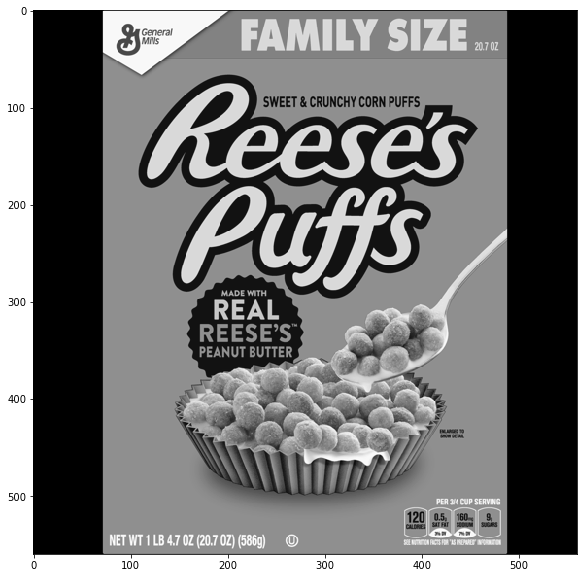

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread('DATA/many_cereals.jpg', 0)

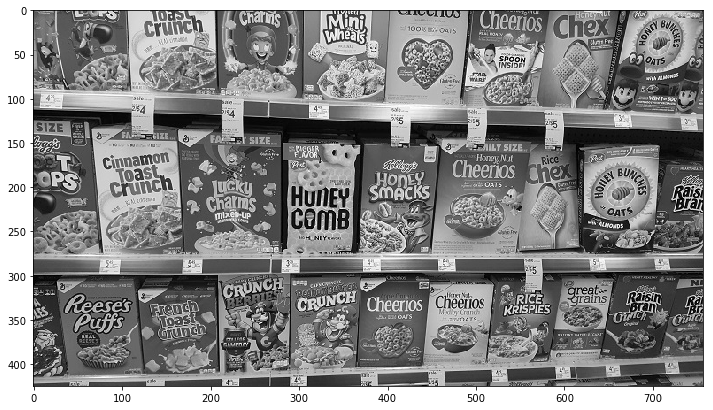

In [6]:
display(cereals)

In [7]:
#Method 1: Brute force detection with ORB
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(reeses, None)
keypoints2, descriptors2 = orb.detectAndCompute(cereals, None)

In [8]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [9]:
matches = bf.match(descriptors1, descriptors2)

In [10]:
matches = sorted(matches, key=lambda x:x.distance)

In [13]:
reeses_matches = cv2.drawMatches(reeses, keypoints1, cereals, keypoints2, matches[:25], None, flags=2)

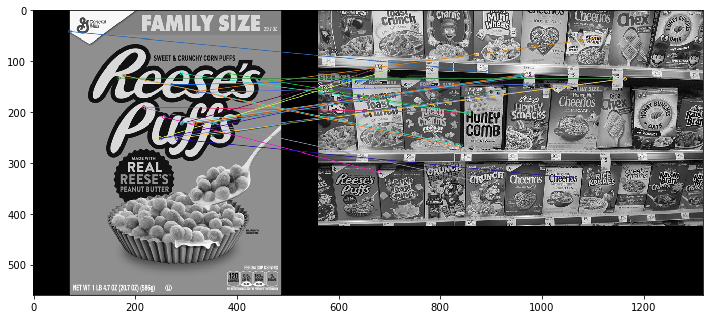

In [14]:
display(reeses_matches)

In [16]:
#Method 2 SIFT descriptors (when image sizes are different)
sift = cv2.xfeatures2d.SIFT_create()
keypoints1,descriptors1 = sift.detectAndCompute(reeses,None)
keypoints2,descriptors2 = sift.detectAndCompute(cereals,None)

In [17]:
bf = cv2.BFMatcher()

In [19]:
matches = bf.knnMatch(descriptors1, descriptors2, k=2) #Finds k best matches

In [20]:
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [21]:
len(matches)

1500

In [22]:
len(good)

78

In [23]:
sift_matches = cv2.drawMatchesKnn(reeses, keypoints1, cereals, keypoints2, good, None, flags=2)

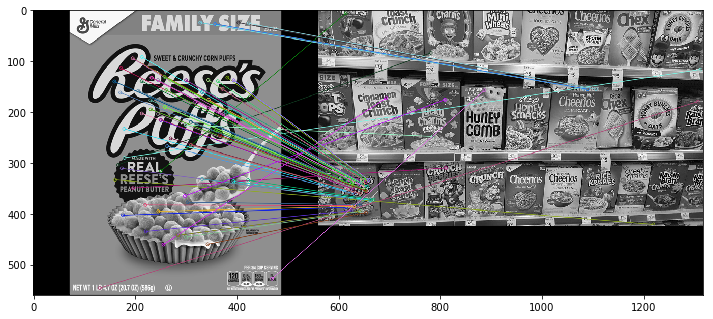

In [24]:
display(sift_matches)

In [25]:
# 3 option: Flann matches. much faster than brute force matcher, but not better than sift
sift = cv2.xfeatures2d.SIFT_create()
keypoints1,descriptors1 = sift.detectAndCompute(reeses,None)
keypoints2,descriptors2 = sift.detectAndCompute(cereals,None)

In [27]:
#FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees = 5)

In [28]:
search_params = dict(checks=50)

In [29]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [30]:
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

In [31]:
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [32]:
len(matches)

1500

In [33]:
len(good)

78

In [34]:
flann_matches = cv2.drawMatchesKnn(reeses, keypoints1, cereals, keypoints2, good, None)

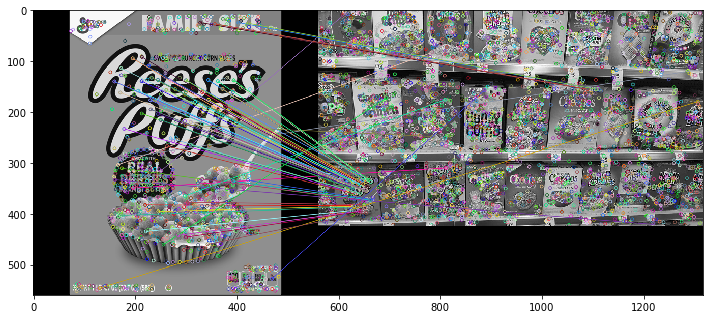

In [35]:
display(flann_matches)

In [36]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

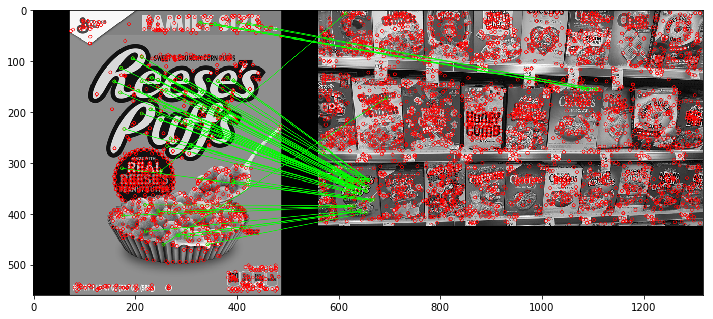

In [37]:
display(flann_matches)